In [1]:
#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [3]:
df = pd.read_csv("C:/Users/Aman Nema/Downloads/archive (3)/Dry_Bean.csv")

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.shape

(13611, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
#checing for the null values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
#checking for the quality of data from mean median mode std etc
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [9]:
df.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='Count'>

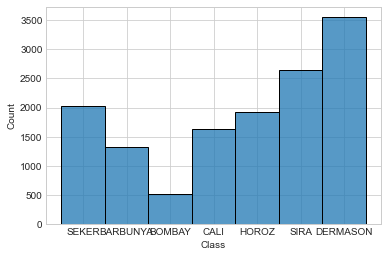

In [10]:
#visualizing bargraph of class
sns.histplot(df.Class)

<AxesSubplot:ylabel='Class'>

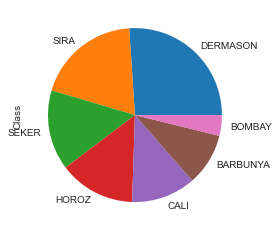

In [11]:
df.Class.value_counts().plot(kind='pie')

# Models

In [12]:
#Data Spliting
x= df.iloc[:,:-1].values  
y= df.iloc[:, -1].values 

In [13]:
#train test split
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [15]:
#Importing EvaluAtion Libraries
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [17]:
y_pred=classifier1.predict(x_test)

In [18]:
Evaluation=pd.DataFrame(['Random Forest'],columns=['Algorithm'])
Evaluation.loc[0,'Algorithm']='RF'
Evaluation.loc[0,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,RF,0.920952,0.920952,0.920952,0.920952


In [19]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       319
      BOMBAY       1.00      0.99      1.00       111
        CALI       0.94      0.93      0.93       419
    DERMASON       0.91      0.94      0.92       905
       HOROZ       0.95      0.93      0.94       491
       SEKER       0.95      0.95      0.95       470
        SIRA       0.87      0.85      0.86       688

    accuracy                           0.92      3403
   macro avg       0.94      0.93      0.93      3403
weighted avg       0.92      0.92      0.92      3403



In [20]:
classifier1.score(x_test,y_test)

0.920952101087276

In [21]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[291   0  13   0   2   2  11]
 [  1 110   0   0   0   0   0]
 [ 18   0 389   0   8   1   3]
 [  0   0   0 852   2  12  39]
 [  2   0  13   3 458   0  15]
 [  0   0   0   6   0 448  16]
 [  2   0   1  80  12   7 586]]


# AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
ABC = AdaBoostClassifier()

In [24]:
ABC.fit(x_train, y_train)

AdaBoostClassifier()

In [25]:
y_pred = ABC.predict(x_test)

In [26]:
Evaluation.loc[1,'Algorithm']='AdaBoost'
Evaluation.loc[1,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,RF,0.920952,0.920952,0.920952,0.920952
1,AdaBoost,0.660594,0.660594,0.660594,0.660594


In [27]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       319
      BOMBAY       0.00      0.00      0.00       111
        CALI       0.50      1.00      0.67       419
    DERMASON       0.65      0.98      0.78       905
       HOROZ       0.95      0.72      0.82       491
       SEKER       0.90      0.20      0.32       470
        SIRA       0.80      0.73      0.76       688

    accuracy                           0.66      3403
   macro avg       0.54      0.52      0.48      3403
weighted avg       0.66      0.66      0.61      3403



In [28]:
ABC.score(x_test,y_test)

0.6605935938877461

In [29]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[  0   0 284   0   0   2  33]
 [111   0   0   0   0   0   0]
 [  0   0 417   0   0   1   1]
 [  0   0   0 885   0   0  20]
 [  0   0  95  10 352   0  34]
 [  0   0   1 338   0  92  39]
 [  0   0  31 128  20   7 502]]


# XGBoost Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
XGB = GradientBoostingClassifier()

In [33]:
XGB.fit(x_train, y_train)

GradientBoostingClassifier()

In [34]:
y_pred = XGB.predict(x_test)

In [35]:
Evaluation.loc[2,'Algorithm']='XGBoost'
Evaluation.loc[2,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,RF,0.920952,0.920952,0.920952,0.920952
1,AdaBoost,0.660594,0.660594,0.660594,0.660594
2,XGBoost,0.928886,0.928886,0.928886,0.928886


In [36]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.90      0.92       319
      BOMBAY       1.00      0.99      1.00       111
        CALI       0.93      0.95      0.94       419
    DERMASON       0.92      0.94      0.93       905
       HOROZ       0.95      0.96      0.95       491
       SEKER       0.95      0.95      0.95       470
        SIRA       0.89      0.88      0.88       688

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403



In [37]:
XGB.score(x_test,y_test)

0.9288862768145754

In [38]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[287   0  18   0   3   3   8]
 [  1 110   0   0   0   0   0]
 [ 10   0 396   0   9   1   3]
 [  1   0   0 849   4  14  37]
 [  1   0   8   3 469   0  10]
 [  1   0   0   4   0 447  18]
 [  2   0   2  69   8   4 603]]


# Comparing model

<AxesSubplot:xlabel='Algorithm', ylabel='Precision'>

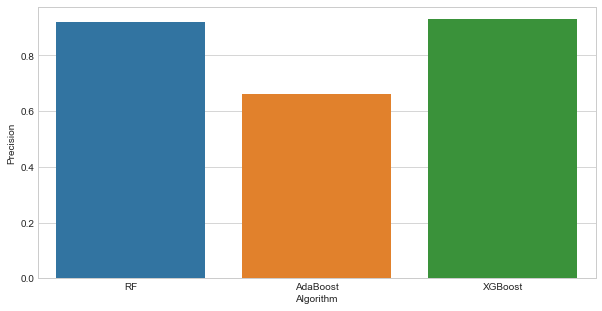

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Precision',data=Evaluation)

<AxesSubplot:xlabel='Algorithm', ylabel='Accuracy'>

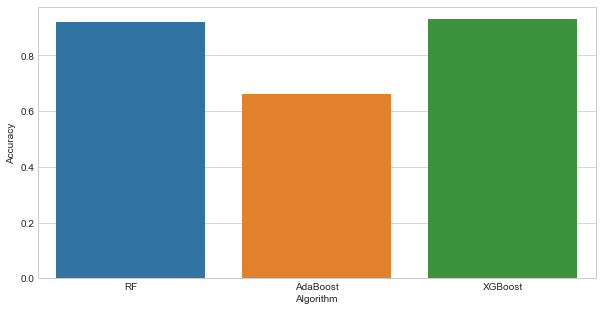

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Accuracy',data=Evaluation)

<AxesSubplot:xlabel='Algorithm', ylabel='Recall'>

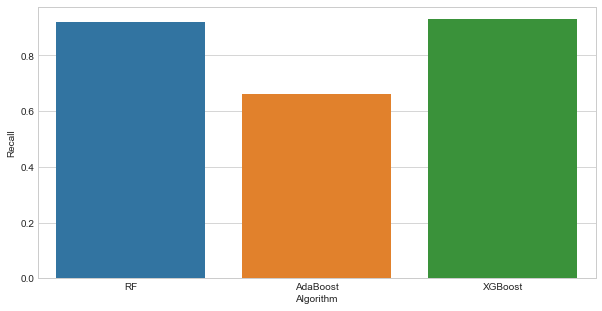

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Recall',data=Evaluation)

<AxesSubplot:xlabel='Algorithm', ylabel='F1 Score'>

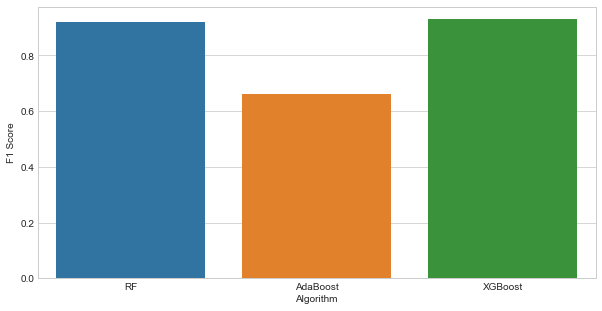

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='F1 Score',data=Evaluation)

In [43]:
Evaluation[Evaluation.Recall==Evaluation.Recall.min()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
1,AdaBoost,0.660594,0.660594,0.660594,0.660594


In [44]:
Evaluation[Evaluation.Recall==Evaluation.Recall.max()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
2,XGBoost,0.928886,0.928886,0.928886,0.928886


In [45]:
Evaluation[Evaluation.Precision==Evaluation.Precision.min()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
1,AdaBoost,0.660594,0.660594,0.660594,0.660594


In [46]:
Evaluation[Evaluation.Precision==Evaluation.Precision.max()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
2,XGBoost,0.928886,0.928886,0.928886,0.928886


In [47]:
Evaluation[Evaluation.Accuracy==Evaluation.Accuracy.min()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
1,AdaBoost,0.660594,0.660594,0.660594,0.660594


In [48]:
Evaluation[Evaluation.Accuracy==Evaluation.Accuracy.max()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
2,XGBoost,0.928886,0.928886,0.928886,0.928886


In [49]:
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,RF,0.920952,0.920952,0.920952,0.920952
1,AdaBoost,0.660594,0.660594,0.660594,0.660594
2,XGBoost,0.928886,0.928886,0.928886,0.928886


# CONCLUSION
1. RF gives 92% accuracy
2. AdaBoost gives 62% accuracy which is very low
3. XGBoost gives 93% of accuracy similar to RF
4. RF AND XGBoost